<h2> Michael Kumakech Data Scientist<h2>

<b>Lets first import required libraries:</b>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

<b> Load the Telco Churn data</b>

In [2]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2021-05-03 09:38:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.07s   

2021-05-03 09:38:28 (473 KB/s) - ‘ChurnData.csv’ saved [36144/36144]



<b> Load Data From CSV File</b>


In [3]:
import pandas as pd
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<b> Data pre-processing and selection</b>

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip', 'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [5]:
churn_df.shape

(200, 10)

<b>Lets define X, and y for our dataset:</b>

In [6]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

<b> Also, we normalize the dataset:</b>

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

<h2> Train/Test dataset</h2>

<b> We split our dataset into train and test set:</b>

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2> Modeling (Logistic Regression with Scikit-learn)</h2>

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

<b> Now we can predict using our test set:</b>

In [86]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

<b>predict_proba </b> returns estimates for all classes, ordered by the label of classes. So, the first column
is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [87]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

<h2> Evaluation</h2>

<b>1.0 jaccard Index </b>

In [88]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

<b> 2.0 confusion matrix</b>

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
#This function prints and plots the confusion matrix.
#Normalization can be applied by setting `normalize=True`.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


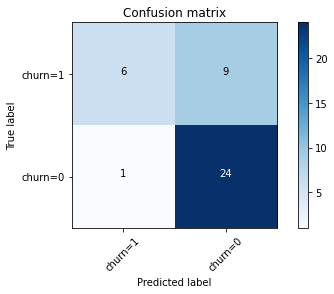

In [90]:
# Compute confusion matrix


In [83]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        34
           1       0.78      0.44      0.56        16

    accuracy                           0.78        50
   macro avg       0.78      0.69      0.71        50
weighted avg       0.78      0.78      0.76        50



<h2> Decision Tree Algorithm Classifier </h2>

In [17]:
!pip install six

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [18]:
!pip install pydotplus

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 278 kB 14.6 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=6750a5409dc6ff1c0419194b713537e1bdaa458e7f89159cad5d15e0248eee27
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [19]:
from six import StringIO

In [20]:
import six
import sys
sys.modules['sklearn.externals.six'] = six


In [21]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<b> Build an empty DecisionTree object with depth 5</b>

In [45]:
TelecomTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
TelecomTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

<b> Train the decision tree using the global X data set. </b>

In [30]:
#Feature = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip']]
#Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#Feature.head()


In [56]:
TelecomTree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

<h2>Prediction</h2>

In [57]:
predTree = TelecomTree.predict(X_test)

In [58]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 1 0 1]


<h2>Evaluation</h2>

In [62]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [63]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9


In [64]:
yhat_tree=TelecomTree.predict(X_test)
tree_jacc_test=metrics.jaccard_score(y_test, yhat_tree)
tree_f1_test=metrics.f1_score(y_test, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y_test, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y_test, yhat_tree))
tree_cnf_matrix


Accuracy is  0.7333333333333333  F1 is 0.8860398860398859
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.73      0.85        15

    accuracy                           0.90        40
   macro avg       0.93      0.87      0.89        40
weighted avg       0.91      0.90      0.90        40



array([[25,  0],
       [ 4, 11]])

<h2>Support Vector Machine</h2>

In [65]:
from sklearn import svm
EVDSVM = svm.SVC(kernel='rbf')
EVDSVM.fit(X, y)

SVC()

<b> Calculate accuracy and F1 for Support Vector Machine</b>

In [66]:
yhat_svm=EVDSVM.predict(X)
svm_jacc_test=metrics.jaccard_score(y, yhat_svm)
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix

Accuracy is  0.3382352941176471  F1 is 0.6799317187666702
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       142
           1       0.70      0.40      0.51        58

    accuracy                           0.78       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.78      0.75       200



array([[132,  10],
       [ 35,  23]])

<h2> K Nearest Neighbor(KNN)</h2>

Split the initial train set in train and cross validation set. Use 80% of the data set for training and 20% for cross validation

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)

Train set: (160, 7) (160,)
Cross validation set: (40, 7) (40,)


<b> Import library</b>

In [92]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

<b> Find the best k by training and predicting</b>

Train the model for various k between 1 and 9 and choose the one with the best accuracy on the cross validation set.

In [94]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#Predict on the Cross Validation set
    yhat_cv=neigh.predict(X_cv)
    #Calculate 
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat_cv)

    
    std_acc[n-1]=np.std(yhat_cv==y_cv)/np.sqrt(yhat_cv.shape[0])

mean_acc

array([0.62, 0.7 , 0.7 , 0.7 , 0.72, 0.75, 0.7 , 0.78, 0.75])

<b> Display the accuracy of the model for the various K</b>

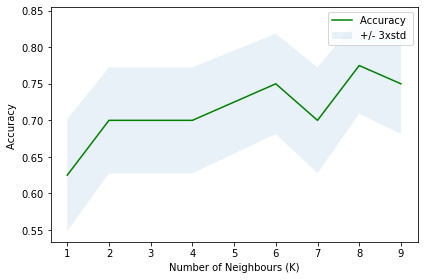

The best accuracy was 0.775 with k= 8


In [95]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

<b> Now generate and store the model on the global train set for the optimal k = 5.</b>

In [96]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X, y)
neigh

KNeighborsClassifier(n_neighbors=8)

<h2> KNN Evaluation</h2>

<b> Jaccard index for accuracy evaluation.</b>

In [97]:
from sklearn.metrics import jaccard_score
jaccard_score( y_cv,  yhat_cv)

0.375

<b> Calculate accuracy and F1 for KNN algorithm</b>

In [98]:
#yhat_test=neigh.predict(X_test)
kn_jacc_test=metrics.jaccard_score(y_cv,  yhat_cv)
kn_f1_test=metrics.f1_score(y_cv,  yhat_cv, average ='macro')
kn_cnf_matrix = confusion_matrix(y_cv,  yhat_cv)
print("Accuracy is ", kn_jacc_test, " F1 is" , kn_f1_test)
print(classification_report(y_cv,  yhat_cv))
kn_cnf_matrix

Accuracy is  0.375  F1 is 0.6865203761755486
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



array([[24,  1],
       [ 9,  6]])

Thanks for completing this lesson!

<b>Author: </b> Michael Kumakech


Michael Kumakech, Eng. is a Data Scientist in Makerere University with a track record of developing enterprise
level applications that substantially increases clients’ ability to turn data into actionable knowledge.
He is a researcher in data mining field and expert in developing advanced analytic methods like
machine learning and statistical modelling on large datasets.